In [1]:
from IPython.display import Markdown

import sys
sys.path.append('..')
from utils import *

In [12]:
prompt_template='../prompt_template.md'
arxiv_number='2111.01152'
prompt_dict=load_prompt_template(prompt_template)
with open(f'{arxiv_number}.yaml','r') as f:
    kwargs= yaml.safe_load(f)

In [3]:
prompt=generate_prompt(kwargs[1],prompt_dict)

In [4]:
Markdown(prompt['content'])

You will be instructed to describe the kinetic term of Hamiltonian in a system with two layers in the real space in the single-particle form.   
The degrees of freedom of the system are: valley index (+K and -K valley), layer index (top and bottom layer)..  
Express the Kinetic Hamiltonian H_{\tau} using variables which are only on the diagonal terms, and arrange the basis in the order of (+K,bottom), (+K,top), (-K,bottom), (-K,top). 

Use the following conventions for the symbols:  
$\tau=\pm 1$ represents $\pm K$ valleys, $\bm{\kappa}=\frac{4\pi}{3a_M}\left(1,0\right)$ is at a corner of the moiré Brillouin zone. The $2\times 2$ Hamiltonian hybridizes the bottom layer ($\mathfrak{b}$) and top layer ($\mathfrak{t}$), where the off diagonal terms describe the interlayer tunneling $\Delta_{\text{T},\tau}$, and the diagonal terms describe the momentum-shifted kinetic energy with the effective mass $(m_{\mathfrak{b}},m_{\mathfrak{t}})=(0.65,0.35)m_e$ ($m_e$ is the rest electron mass), plus the intralayer potential $\Delta_{\mathfrak{b}/\mathfrak{t}}$, and a band offset $V_{z\mathfrak{t}}$.

In [5]:
print(prompt['content'])

You will be instructed to describe the kinetic term of Hamiltonian in a system with two layers in the real space in the single-particle form.   
The degrees of freedom of the system are: valley index (+K and -K valley), layer index (top and bottom layer)..  
Express the Kinetic Hamiltonian H_{\tau} using variables which are only on the diagonal terms, and arrange the basis in the order of (+K,bottom), (+K,top), (-K,bottom), (-K,top). 

Use the following conventions for the symbols:  
$\tau=\pm 1$ represents $\pm K$ valleys, $\bm{\kappa}=\frac{4\pi}{3a_M}\left(1,0\right)$ is at a corner of the moiré Brillouin zone. The $2\times 2$ Hamiltonian hybridizes the bottom layer ($\mathfrak{b}$) and top layer ($\mathfrak{t}$), where the off diagonal terms describe the interlayer tunneling $\Delta_{\text{T},\tau}$, and the diagonal terms describe the momentum-shifted kinetic energy with the effective mass $(m_{\mathfrak{b}},m_{\mathfrak{t}})=(0.65,0.35)m_e$ ($m_e$ is the rest electron mass), plus

In [9]:
with open(f'{arxiv_number}_tmp.yaml','w') as f:
    # kwargs= yaml.safe_load(f)
    yaml.dump(prompt,f,default_flow_style=False,sort_keys=False)

In [11]:
data = {
    'key': 'this is line1\nthis is line2\n'
}

with open(f'{arxiv_number}_tmp.yaml','w') as file:
    yaml.dump(data, file,default_style='|', default_flow_style=False)

In [13]:
import matplotlib as plt

In [16]:
kwargs[1]['score']

{'prompt_quality': 1,
 'follow_instructions': 1,
 'physics_logic': 2,
 'math_derivation': 2,
 'final_answer_accuracy': 1}

In [23]:
kwarg['score']

{'prompt_quality': 1,
 'follow_instructions': 1,
 'physics_logic': 2,
 'math_derivation': 2,
 'final_answer_accuracy': 1}

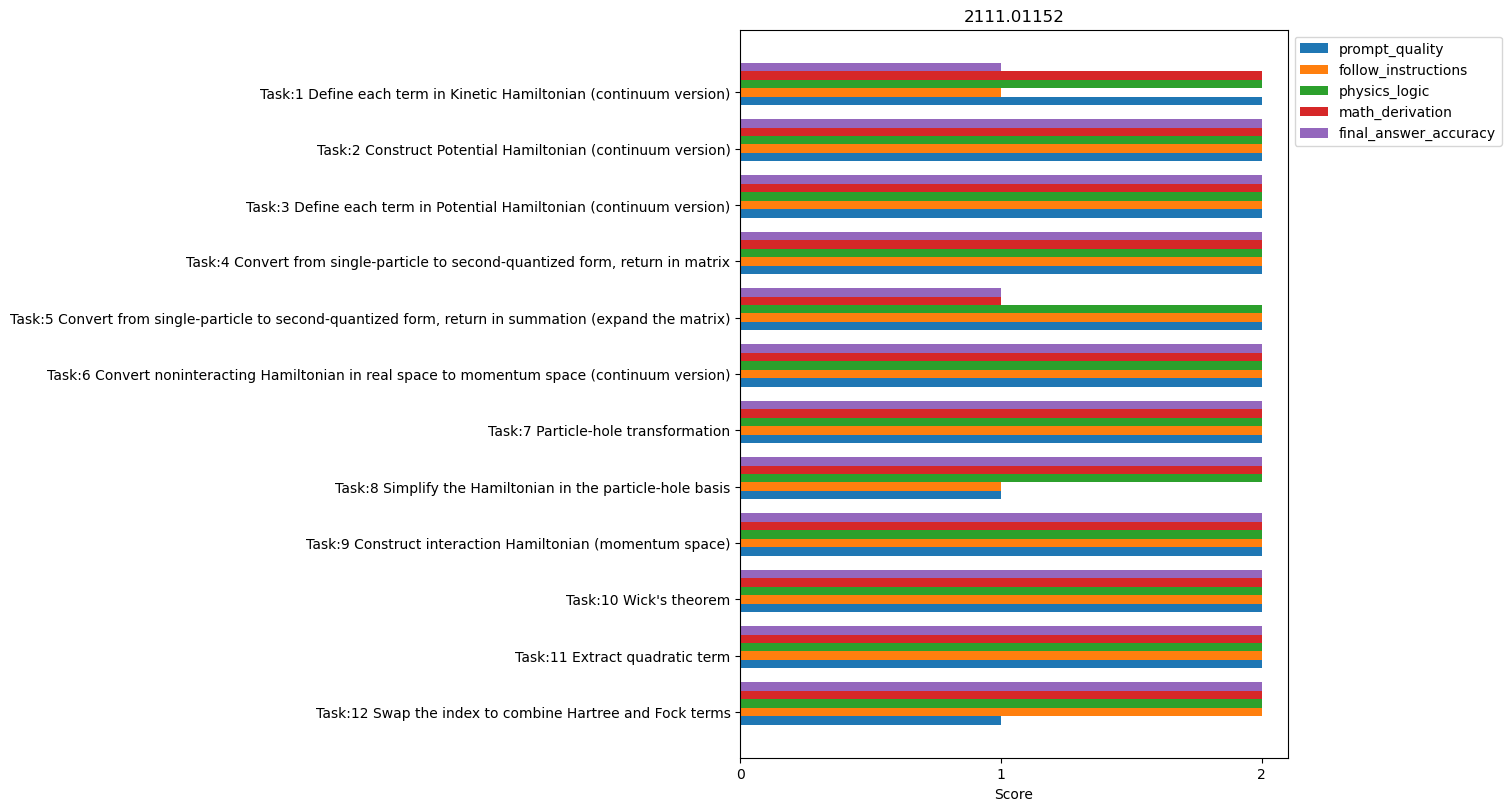

In [61]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

tasks = [f'Task:{len(kwargs)-idx-2} '+kwarg['task'] for idx,kwarg in enumerate(kwargs[:1:-1])]
aspect_score={}
for kwarg in kwargs[:1:-1]:
    for key,value in kwarg['score'].items():
        if key not in aspect_score:
            aspect_score[key]=[value]
        else:
            aspect_score[key].append(value)


x = np.arange(len(tasks))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained',figsize=(15,8))

for attribute, measurement in aspect_score.items():
    offset = width * multiplier
    rects = ax.barh(x + offset, measurement, width, label=attribute)
    # ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Score')
ax.set_xticks([0,1,2])
ax.set_title(f'{arxiv_number}')
ax.set_yticks(x + width, tasks)
ax.legend(loc='upper left', ncols=1,bbox_to_anchor=(1, 1))
# ax.set_ylim(0, 250)

plt.show()